## Electric vehicles market size analysis using python
### Source file

* https://thecleverprogrammer.com/2024/03/18/electric-vehicles-market-size-analysis-using-python/

* https://data.gov/

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
ev_data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [10]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [12]:
ev_data = ev_data.dropna()

In [15]:
ev_data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


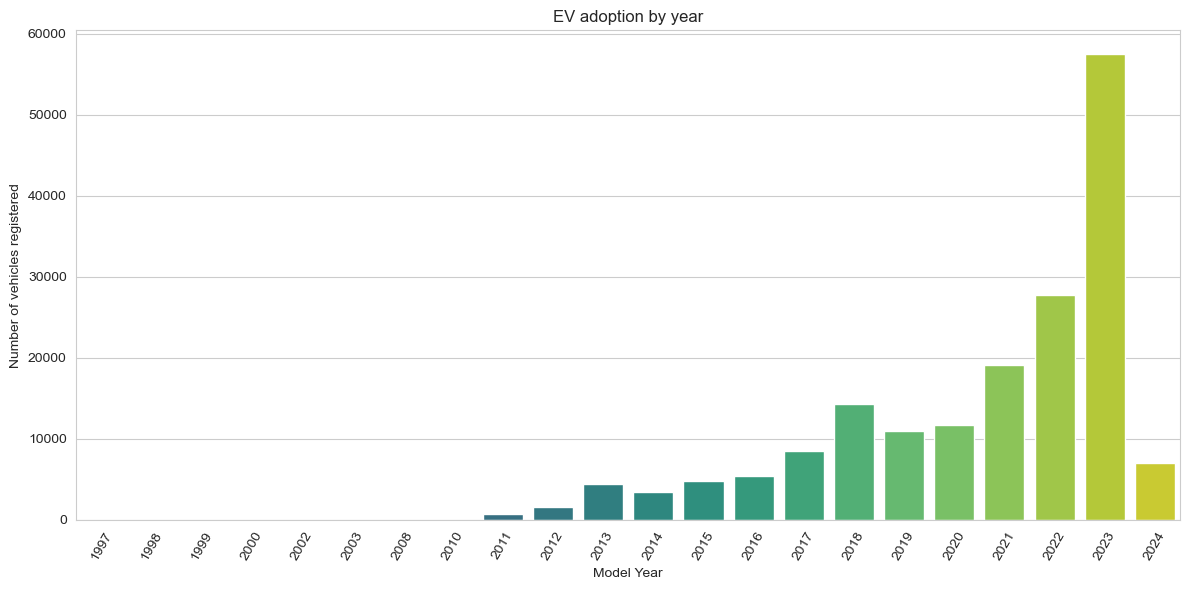

In [35]:
# Ev Adoption over time

plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('EV adoption by year')
plt.xlabel('Model Year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [45]:
# Geographical distribution at county level

ev_data_distribution = ev_data['County'].value_counts()
top_counties = ev_data_distribution.head(3).index
top_counties

Index(['King', 'Snohomish', 'Pierce'], dtype='object')

In [51]:
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]


In [79]:
# analyze the distribution of evs within the cities of these counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [82]:
# Visualize top 10 cities across the counties

top_cities = ev_city_distribution_top_counties.head(10)
top_cities.head(1)


,County,City,Number of Vehicles
0,King,Seattle,29447


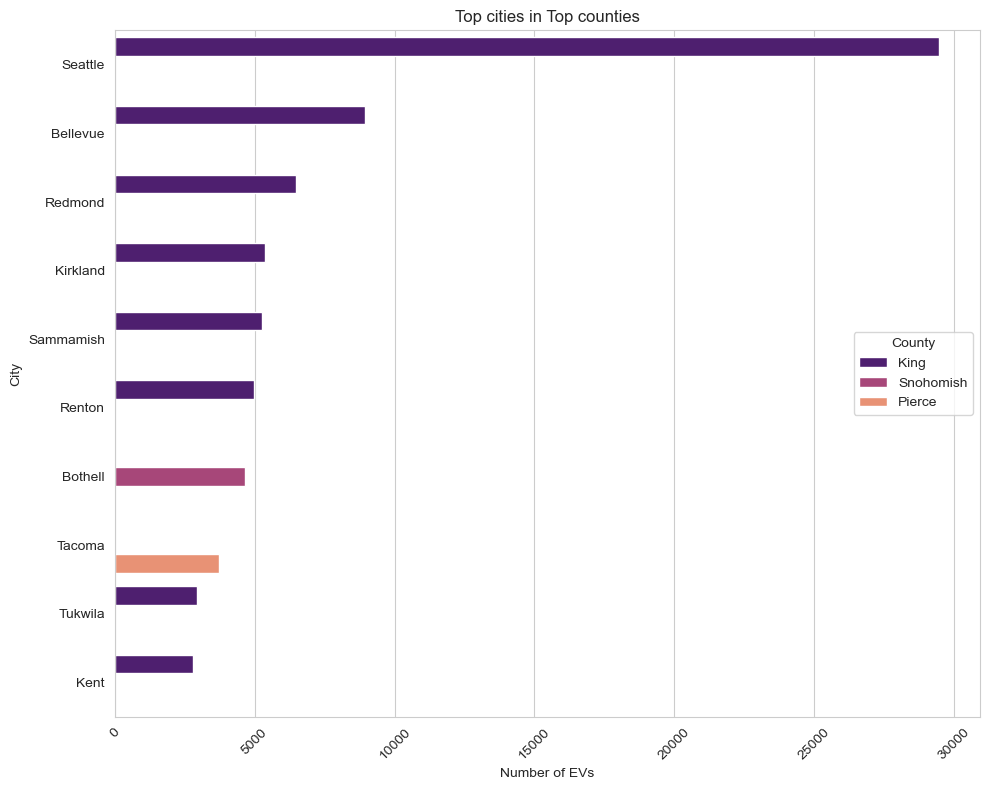

In [89]:
plt.figure(figsize=(10,8))

sns.barplot(x='Number of Vehicles', y='City', data=top_cities, hue='County', palette='magma')
plt.title('Top cities in Top counties')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.legend(title='County', loc=7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# you can use this below code or the above code using .isin() method

# ev_data[(ev_data['County'] == top_counties[0]) | (ev_data['County'] == top_counties[1]) | (ev_data['County'] == top_counties[2])]

In [36]:
# ev_data.info()

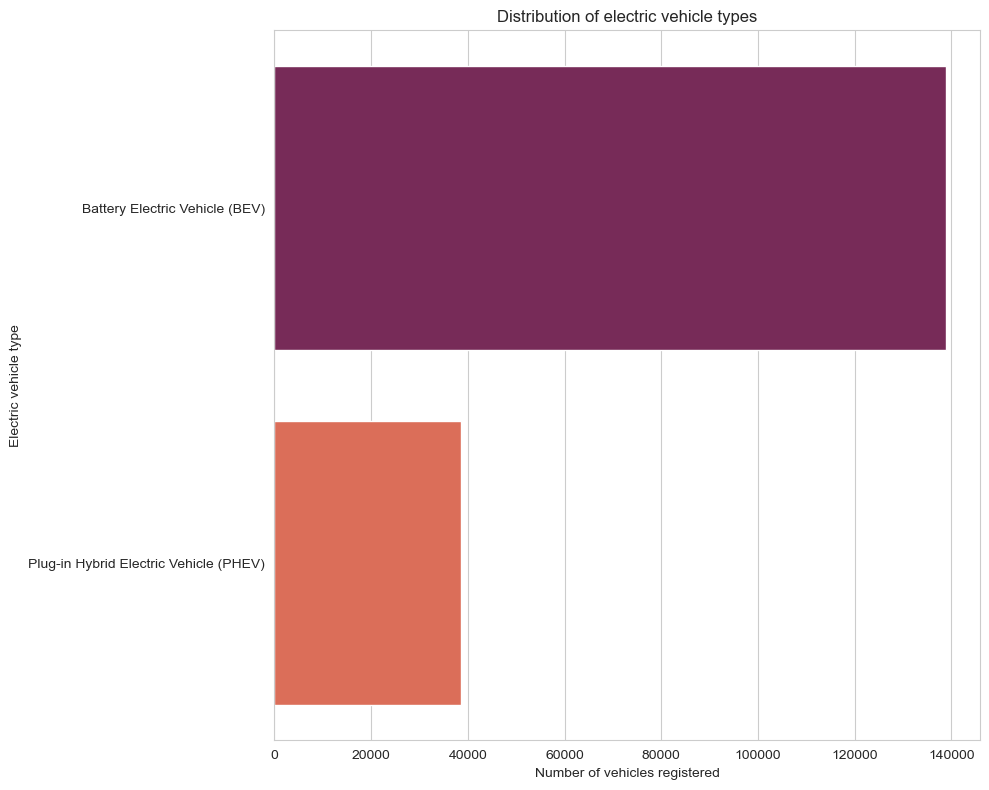

In [101]:
# analyze the distribution of ev types 
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette='rocket')
plt.title('Distribution of electric vehicle types')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Electric vehicle type')
plt.tight_layout()
plt.show()

In [98]:
ev_type_distribution.values

array([138947,  38526], dtype=int64)

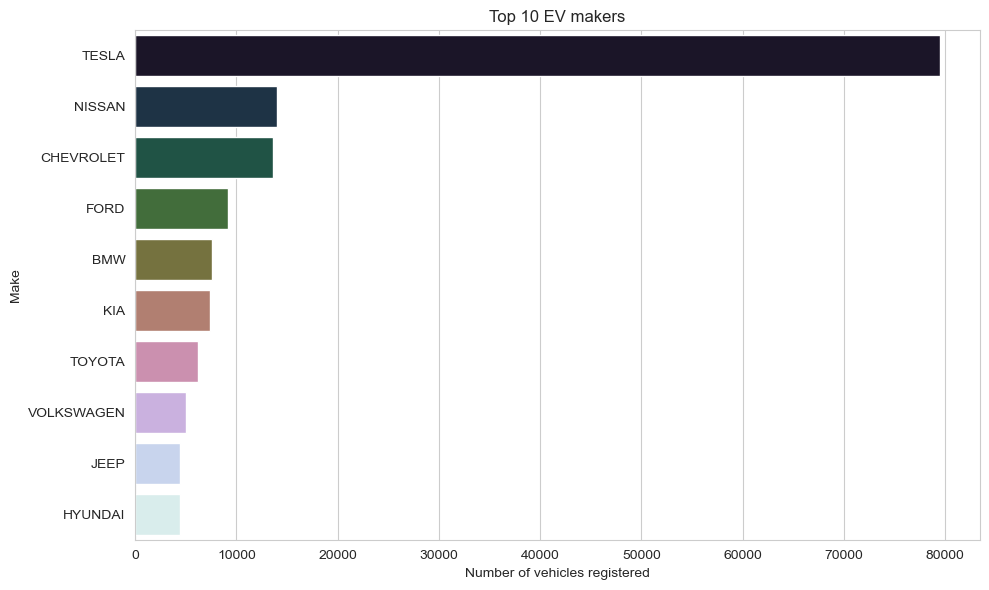

In [109]:
# analyse the popularity of ev makers
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette='cubehelix')
plt.title('Top 10 EV makers')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [110]:
# selecting top 3 manufacturers based on the no.of vehicles registered

top_3_makes = ev_make_distribution.head(3).index

# filtering datasets for these makers


Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object')

In [119]:
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]
ev_model_dist_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of vehicles')

In [123]:
top_models = ev_model_dist_top_makes.head(10)
top_models.head(2)

,Make,Model,Number of vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009


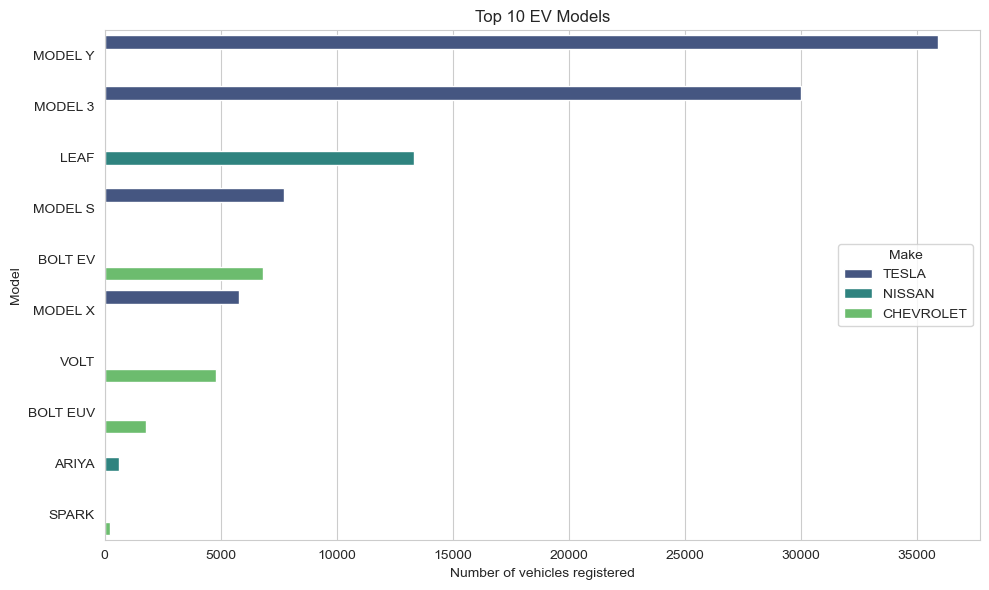

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_models['Number of vehicles'], y=top_models['Model'],hue=top_models['Make'], palette='viridis')
plt.title('Top 10 EV Models')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

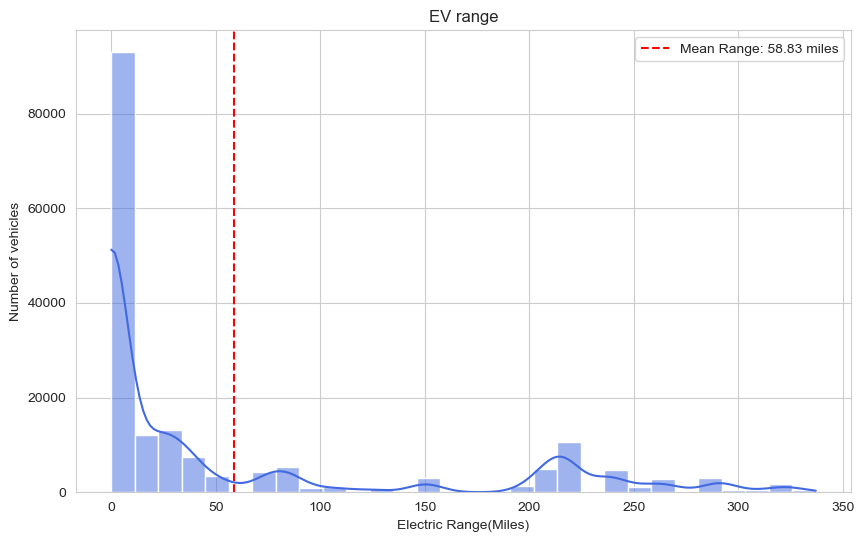

In [138]:
# analyze the range of the electric vehicles

plt.figure(figsize=(10,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('EV range')
plt.xlabel('Electric Range(Miles)')
plt.ylabel('Number of vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

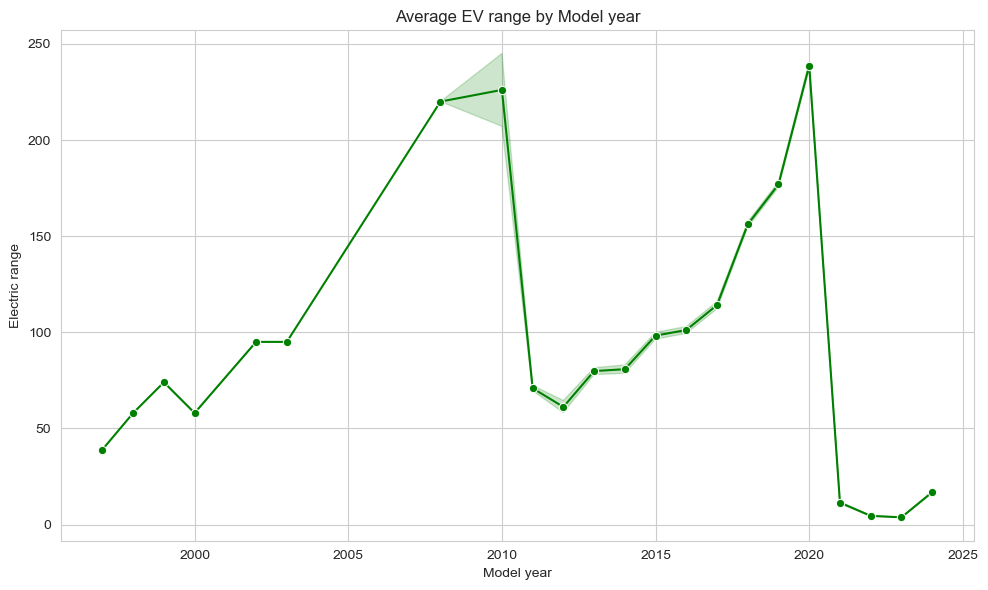

In [150]:
avg_range_by_year = ev_data.groupby(['Model Year'])['Electric Range'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=ev_data['Model Year'], y=ev_data['Electric Range'], marker='o', color='green')
plt.title('Average EV range by Model year')
plt.xlabel('Model year')
plt.ylabel('Electric range')
plt.tight_layout()
plt.grid(True)
plt.show()

In [155]:
avg_range_by_model = ev_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models = avg_range_by_model.head(10)

In [156]:
top_range_models.head(2)

,Make,Model,Electric Range
0,HYUNDAI,KONA,258.000000
1,TESLA,ROADSTER,234.673913


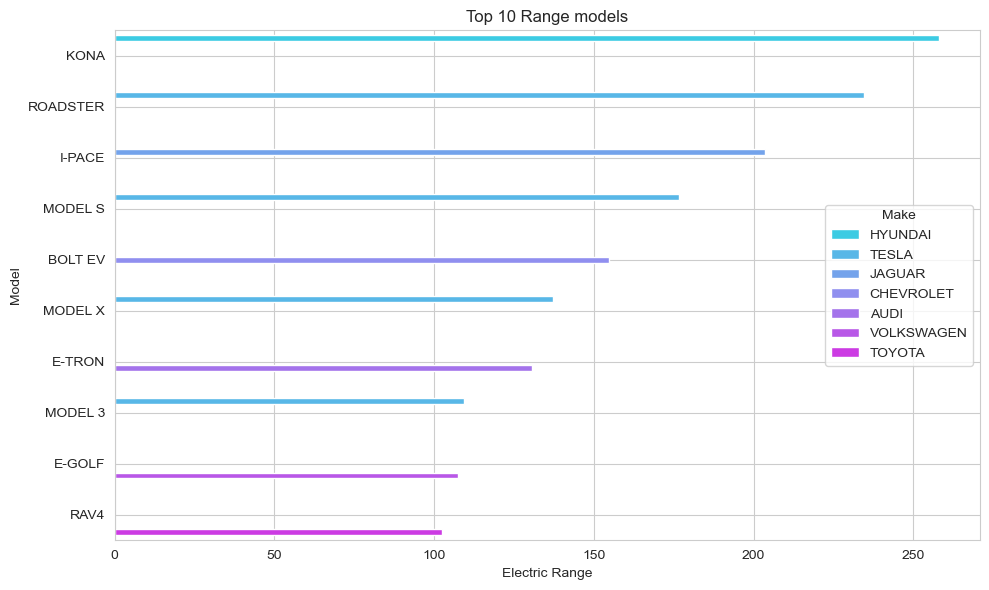

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette='cool')
plt.title('Top 10 Range models')
plt.xlabel('Electric Range')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [173]:
# calculate the no.of EVs registered by year
from scipy.optimize import curve_fit
import numpy as np

ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

In [180]:
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]


# function for exponential growth to fit the data

def exp_growth(x, a,b):
    return a * np.exp(b * x)


In [181]:
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [182]:
params, covariance = curve_fit(f=exp_growth, xdata=x_data, ydata=y_data)


In [183]:
params

array([1.1008126 , 0.41415395])

In [184]:
forecast_years = np.arange(2024, 2024+6) - filtered_years.index.min()


In [186]:
forecasted_values = exp_growth(forecast_years, *params)

In [187]:
forecasted_values

array([ 79079.20808939, 119653.96274429, 181047.22020266, 273940.74706209,
       414497.01805382, 627171.31284077])

In [198]:
# create a dictionary to display the forecasted values for easier interpretation

forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
forecasted_evs

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

In [194]:
# Plot the estimated market size 

years = np.arange(filtered_years.index.min(), 2029+1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024,2029+1)



In [197]:
actual_values = filtered_years.values


In [200]:
forecast_values_full =  [forecasted_evs[year] for year in forecast_years_full]


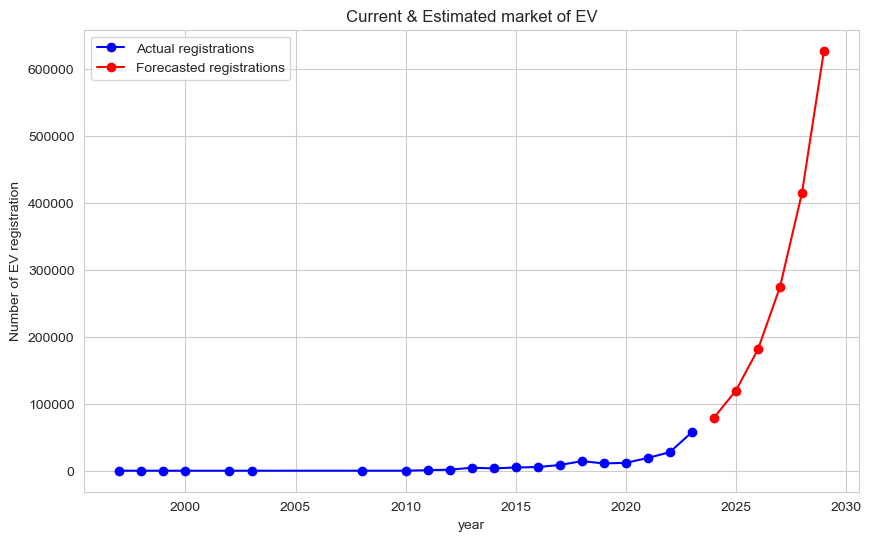

In [201]:
plt.figure(figsize=(10,6))

plt.plot(actual_years, actual_values, 'bo-', label='Actual registrations')
plt.plot(forecast_years_full, forecast_values_full, 'ro-', label='Forecasted registrations')

plt.title('Current & Estimated market of EV')
plt.xlabel('year')
plt.ylabel('Number of EV registration')

plt.legend()
plt.grid(True)
plt.show()
